# Base Field Model for NOAA 1158
Construct a base field model for AR NOAA 1158 that we can build several different heating models on top of.

In [1]:
import os

import numpy as np
from sunpy.map import Map
import yt
import h5py
import astropy.units as u
import astropy.constants as const
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn.apionly as sns
import synthesizAR

%matplotlib inline

/storage-home/w/wtb2/anaconda3/envs/synthesizar/lib/python3.6/site-packages/seaborn/apionly.py:6: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


In [2]:
corners = (u.Quantity([-425,-375],u.arcsec),u.Quantity([-165,-100],u.arcsec))
zshape = 100
zrange = u.Quantity([0,275],u.arcsec)

Take a look at this particular region in a few different wavelengths as well as the magnetogram.

In [3]:
hmi_map = Map('/storage-home/w/wtb2/data/timelag_synthesis/observational_data/hmi_m_45s_2011_02_12_15_33_45_tai_magnetogram.fits')
aia_171_map = Map('/storage-home/w/wtb2/data/timelag_synthesis/observational_data/aia_lev1_171a_2011_02_12t15_32_12_34z_image_lev1.fits')

/storage-home/w/wtb2/anaconda3/envs/synthesizar/lib/python3.6/site-packages/sunpy/image/transform.py:128: RuntimeWarning: Setting NaNs to 0 for higher-order scikit-image rotation
  RuntimeWarning)


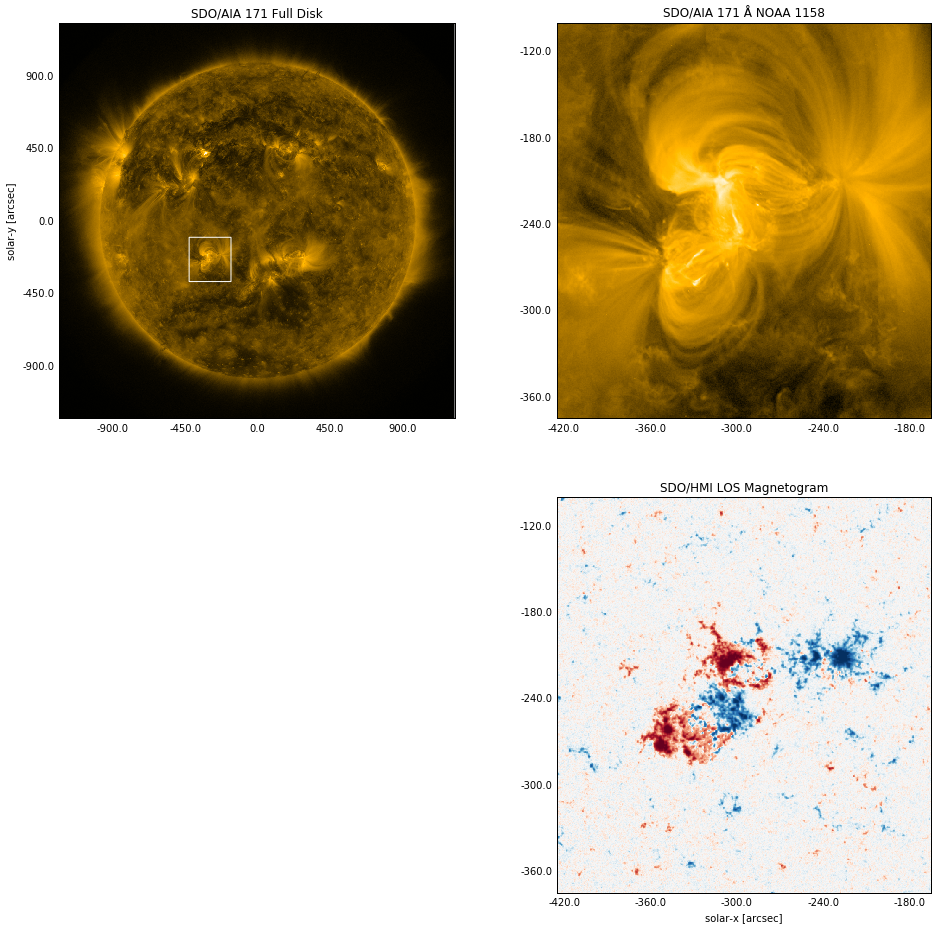

In [4]:
fig = plt.figure(figsize=(16,16))
## AIA
# 171
ax = fig.add_subplot(2,2,1,projection=aia_171_map)
aia_171_map.plot(annotate=False)
blc = SkyCoord(*corners[0], frame=aia_171_map.coordinate_frame)
trc = SkyCoord(*corners[1], frame=aia_171_map.coordinate_frame)
aia_171_map.draw_rectangle(blc, corners[1][0]-corners[0][0], corners[1][1] - corners[0][1])
ax.coords[0].grid(alpha=0)
ax.coords[1].grid(alpha=0)
ax.set_title(r'SDO/AIA 171 Full Disk')
ax.set_ylabel(r'solar-y [arcsec]')
aia_171_submap = aia_171_map.submap(blc,trc)
ax = fig.add_subplot(2,2,2,projection=aia_171_submap)
aia_171_submap.plot(annotate=False)
ax.coords[0].grid(alpha=0)
ax.coords[1].grid(alpha=0)
ax.set_title(r'SDO/AIA 171 Å NOAA 1158')
## HMI
blc = SkyCoord(*corners[0], frame=hmi_map.coordinate_frame)
trc = SkyCoord(*corners[1], frame=hmi_map.coordinate_frame)
hmi_submap = hmi_map.rotate().submap(blc, trc)
ax = fig.add_subplot(2,2,4,projection=hmi_submap)
hmi_submap.plot(annotate=False,cmap=plt.get_cmap('RdBu'),norm=matplotlib.colors.SymLogNorm(50,vmin=-1e3,vmax=1e3))
ax.coords[0].grid(alpha=0)
ax.coords[1].grid(alpha=0)
ax.set_title(r'SDO/HMI LOS Magnetogram')
ax.set_xlabel(r'solar-x [arcsec]')

Now perform the extrapolation.

In [5]:
field = synthesizAR.Skeleton(hmi_fits_file='/storage-home/w/wtb2/data/timelag_synthesis/observational_data/hmi_m_45s_2011_02_12_15_33_45_tai_magnetogram.fits',
                             crop=corners,
                             resample=u.Quantity([100,100],u.pixel))

/storage-home/w/wtb2/anaconda3/envs/synthesizar/lib/python3.6/site-packages/sunpy/image/transform.py:128: RuntimeWarning: Setting NaNs to 0 for higher-order scikit-image rotation
  RuntimeWarning)


In [6]:
field.extrapolate_field(zshape=zshape,zrange=zrange)

/storage-home/w/wtb2/anaconda3/envs/synthesizar/lib/python3.6/site-packages/solarbextrapolation/extrapolators/base.py:81: SunpyDeprecationWarning: This property is only valid for non-rotated WCS
  self.xrange = self.map_boundary_data.xrange.to(map_magnetogram.meta['cunit1'])
/storage-home/w/wtb2/anaconda3/envs/synthesizar/lib/python3.6/site-packages/solarbextrapolation/extrapolators/base.py:82: SunpyDeprecationWarning: This property is only valid for non-rotated WCS
  self.yrange = self.map_boundary_data.yrange.to(map_magnetogram.meta['cunit2'])
/storage-home/w/wtb2/anaconda3/envs/synthesizar/lib/python3.6/site-packages/solarbextrapolation/extrapolators/base.py:83: SunpyDeprecationWarning: This property is only valid for non-rotated WCS
  self.xobsrange = self.map_boundary_data.xrange.to(map_magnetogram.meta['cunit1'])
/storage-home/w/wtb2/anaconda3/envs/synthesizar/lib/python3.6/site-packages/solarbextrapolation/extrapolators/base.py:84: SunpyDeprecationWarning: This property is only 

True


/storage-home/w/wtb2/anaconda3/envs/synthesizar/lib/python3.6/site-packages/synthesizAR-0.1.dev524-py3.6.egg/synthesizAR/field.py:187: SunpyDeprecationWarning: This property is only valid for non-rotated WCS
  lcx, rcx = self.hmi_map.xrange + self.hmi_map.scale.axis1*u.Quantity([boundary_clipping[0], -boundary_clipping[0]], u.pixel)
/storage-home/w/wtb2/anaconda3/envs/synthesizar/lib/python3.6/site-packages/synthesizAR-0.1.dev524-py3.6.egg/synthesizAR/field.py:188: SunpyDeprecationWarning: This property is only valid for non-rotated WCS
  lcy, rcy = self.hmi_map.yrange + self.hmi_map.scale.axis2*u.Quantity([boundary_clipping[1], -boundary_clipping[1]], u.pixel)
/storage-home/w/wtb2/anaconda3/envs/synthesizar/lib/python3.6/site-packages/synthesizAR-0.1.dev524-py3.6.egg/synthesizAR/field.py:195: SunpyDeprecationWarning: This property is only valid for non-rotated WCS
  bbox = np.array([self._convert_angle_to_length(self.clipped_hmi_map.xrange).value,
/storage-home/w/wtb2/anaconda3/envs/s

Extract $1\times10^4$ fieldlines.

In [7]:
field.extract_streamlines(10000,loop_length_range=[1e9,2e10]*u.cm,close_threshold=0.01)

/storage-home/w/wtb2/anaconda3/envs/synthesizar/lib/python3.6/site-packages/synthesizAR-0.1.dev524-py3.6.egg/synthesizAR/util/util.py:68: SunpyDeprecationWarning: This property is only valid for non-rotated WCS
  length_x = convert_angle_to_length(boundary_map_resampled, boundary_map_resampled.xrange)
/storage-home/w/wtb2/anaconda3/envs/synthesizar/lib/python3.6/site-packages/synthesizAR-0.1.dev524-py3.6.egg/synthesizAR/util/util.py:69: SunpyDeprecationWarning: This property is only valid for non-rotated WCS
  length_y = convert_angle_to_length(boundary_map_resampled, boundary_map_resampled.yrange)
yt : [INFO     ] 2017-12-02 13:22:43,205 AMRKDTree rebuilt, Final Volume: 6.345200e+30
Streamlining: 100%|██████████| 10000/10000 [00:14<00:00, 679.12it/s]
yt : [INFO     ] 2017-12-02 13:23:08,456 AMRKDTree rebuilt, Final Volume: 6.345200e+30
Streamlining: 100%|██████████| 5181/5181 [00:07<00:00, 676.92it/s]
yt : [INFO     ] 2017-12-02 13:23:20,971 AMRKDTree rebuilt, Final Volume: 6.345200e+

In [8]:
field.make_loops()

We can examine the distribution of loop lengths over the whole AR.

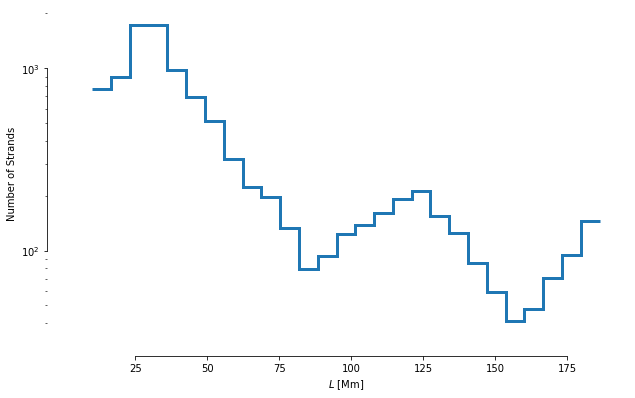

In [9]:
plt.figure(figsize=(10,6))
plt.hist([loop.full_length.to(u.Mm).value for loop in field.loops],histtype='step',lw=3,bins='scott');
plt.xlabel(r'$L$ [Mm]')
plt.ylabel(r'Number of Strands')
plt.yscale('log')
sns.despine(trim=True,offset=20)

Now, we can visualize the magnetogram as well as the AIA observations with the extrapolated loops overlaid.

/storage-home/w/wtb2/anaconda3/envs/synthesizar/lib/python3.6/site-packages/sunpy/image/transform.py:128: RuntimeWarning: Setting NaNs to 0 for higher-order scikit-image rotation
  RuntimeWarning)


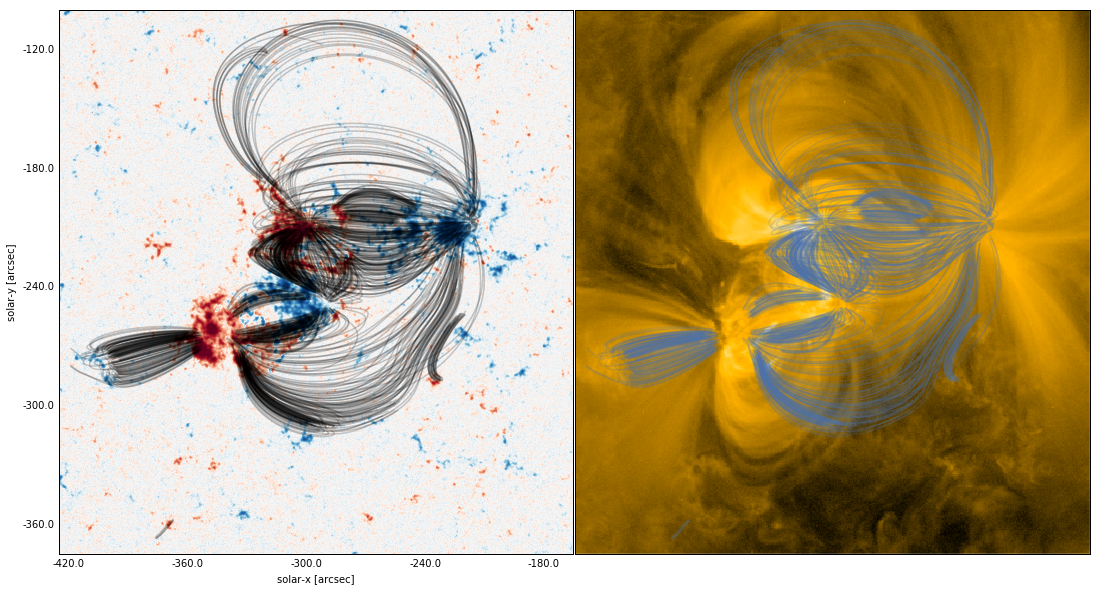

In [10]:
fig = plt.figure(figsize=(18.5,20))
plt.subplots_adjust(hspace=0.,wspace=0.)
## HMI
blc = SkyCoord(*corners[0], frame=hmi_map.coordinate_frame)
trc = SkyCoord(*corners[1], frame=hmi_map.coordinate_frame)
hmi_submap = hmi_map.rotate().submap(blc,trc)
axhmi = fig.add_subplot(2,2,1,projection=hmi_submap)
hmi_submap.plot(annotate=False,cmap=plt.get_cmap('RdBu'),norm=matplotlib.colors.SymLogNorm(50,vmin=-1e3,vmax=1e3))
axhmi.coords[0].grid(alpha=0)
axhmi.coords[1].grid(alpha=0)
axhmi.coords[0].set_ticks_visible(False)
axhmi.coords[1].set_ticks_visible(False)
#axhmi.coords[0].set_ticklabel_visible(False)
axhmi.set_xlabel(r'solar-x [arcsec]')
axhmi.set_ylabel(r'solar-y [arcsec]')
#axhmi.set_title(r'SDO/HMI')
## AIA
# 171
blc = SkyCoord(*corners[0], frame=aia_171_map.coordinate_frame)
trc = SkyCoord(*corners[1], frame=aia_171_map.coordinate_frame)
aia_171_submap = aia_171_map.submap(blc,trc)
ax171 = fig.add_subplot(2,2,2,projection=aia_171_submap)
aia_171_submap.plot(annotate=False)
ax171.coords[0].grid(alpha=0)
ax171.coords[1].grid(alpha=0)
#ax171.set_title('NOAA 1158\nSDO/AIA 171 Å')
ax171.coords[1].set_ticklabel_visible(False)
ax171.coords[0].set_ticklabel_visible(False)
ax171.coords[0].set_ticks_visible(False)
ax171.coords[1].set_ticks_visible(False)

#ax171.set_xlabel(r'solar-x [arcsec]')
#193
#aia_193_submap = aia_193_map.submap(*crop_range)
#ax193 = fig.add_subplot(2,2,4,projection=aia_193_submap)
#aia_193_submap.plot(annotate=False)
#ax193.coords[0].grid(alpha=0)
#ax193.coords[1].grid(alpha=0)
#ax193.coords[0].set_ticks_visible(False)
#ax193.coords[1].set_ticks_visible(False)
##ax193.set_title(r'SDO/AIA 193 Å')
#ax193.set_xlabel(r'solar-x [arcsec]')
#ax193.set_ylabel(r'solar-y [arcsec]')
alpha=0.2
for stream, _ in field.streamlines[::10]:
    axhmi.plot(field._convert_angle_to_length(stream[:, 0]*u.cm,working_units=u.arcsec).to(u.deg),
               field._convert_angle_to_length(stream[:, 1]*u.cm,working_units=u.arcsec).to(u.deg),
               alpha=alpha,color='k',
               transform=axhmi.get_transform('world'))
    ax171.plot(field._convert_angle_to_length(stream[:, 0]*u.cm,working_units=u.arcsec).to(u.deg),
               field._convert_angle_to_length(stream[:, 1]*u.cm,working_units=u.arcsec).to(u.deg),
               alpha=alpha,color=sns.color_palette('deep')[0],
               transform=ax171.get_transform('world'))
    #ax193.plot(field._convert_angle_to_length(stream[:, 0]*u.cm,working_units=u.arcsec).to(u.deg),
    #           field._convert_angle_to_length(stream[:, 1]*u.cm,working_units=u.arcsec).to(u.deg),
    #           alpha=alpha,color=sns.color_palette('deep')[0],
    #           transform=ax193.get_transform('world'))

Finally, save the field to be reloaded later when we are investigating various heating models.

In [11]:
field.save('/storage-home/w/wtb2/data/timelag_synthesis/base_noaa1158')